In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)

In [4]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [5]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [6]:
print("\nClass distribution:")
print(df['species'].value_counts())


Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [7]:
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Pair Plot of Iris Features')

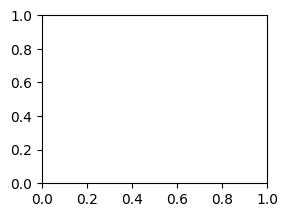

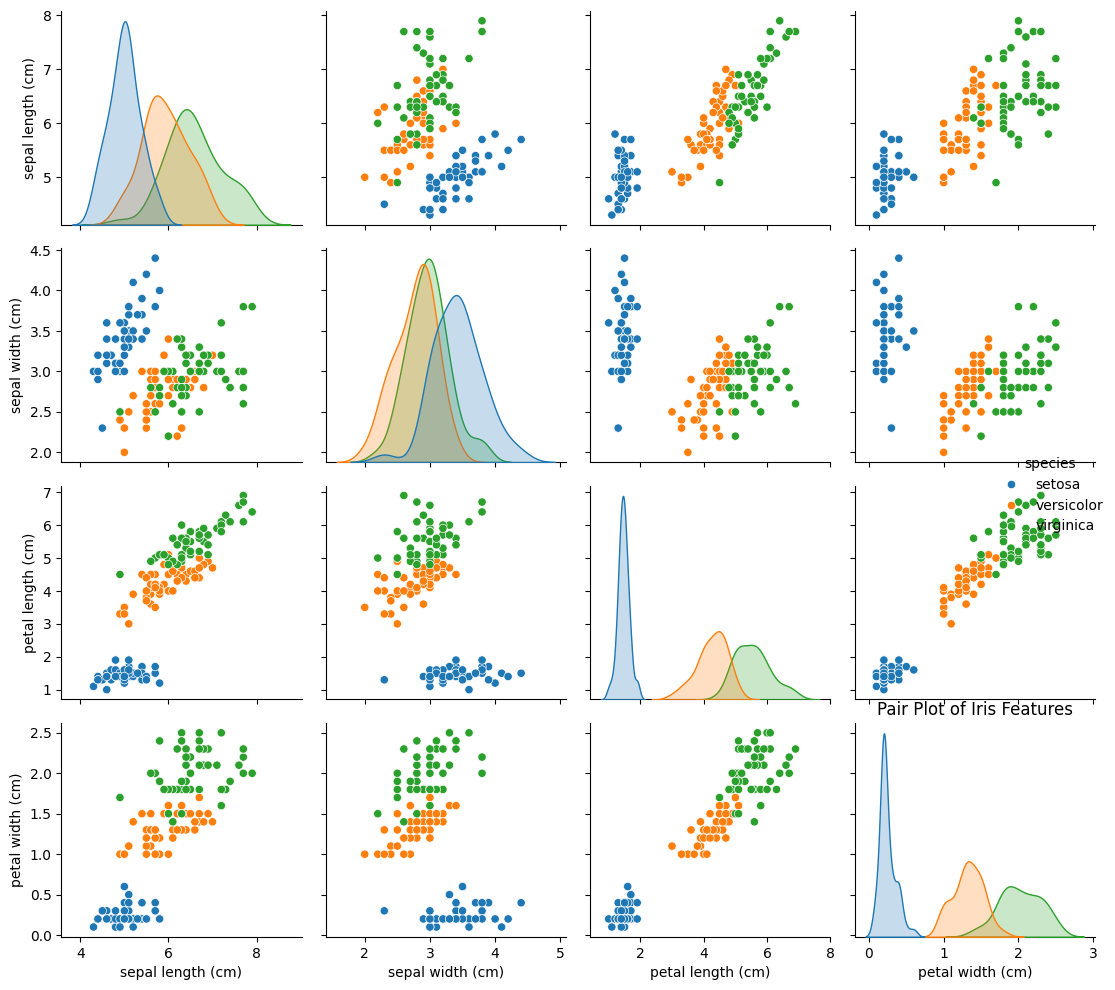

In [8]:
plt.subplot(2, 2, 1)
sns.pairplot(df, hue='species', height=2.5)
plt.tight_layout()
plt.title('Pair Plot of Iris Features')

Text(0.5, 1.0, 'Correlation Matrix of Iris Features')

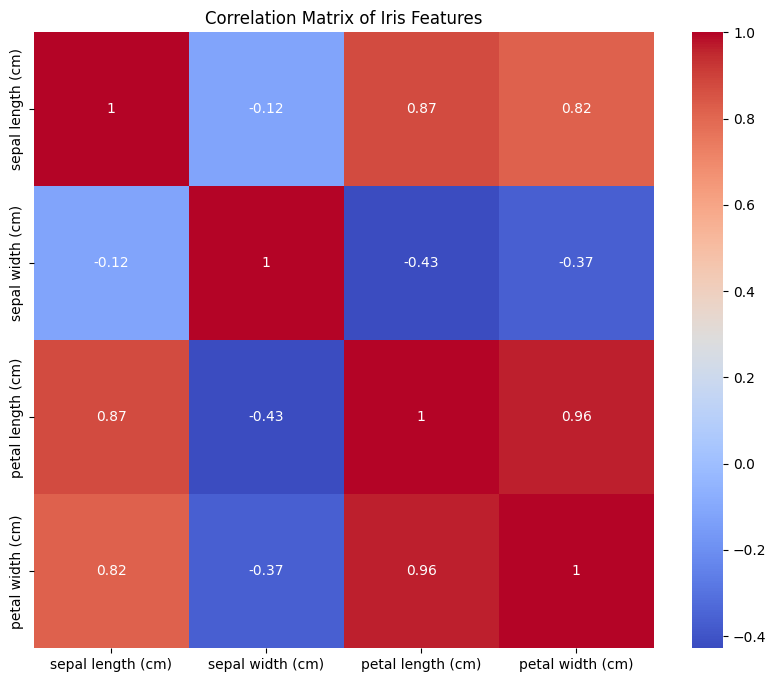

In [9]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Features')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=200)
}

In [14]:
results = {}


Random Forest Results:
Accuracy: 0.8889

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


Support Vector Machine Results:
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


K-Nearest Neighbors Results:
Accuracy: 0.9111

Classification Report:
              precision    r

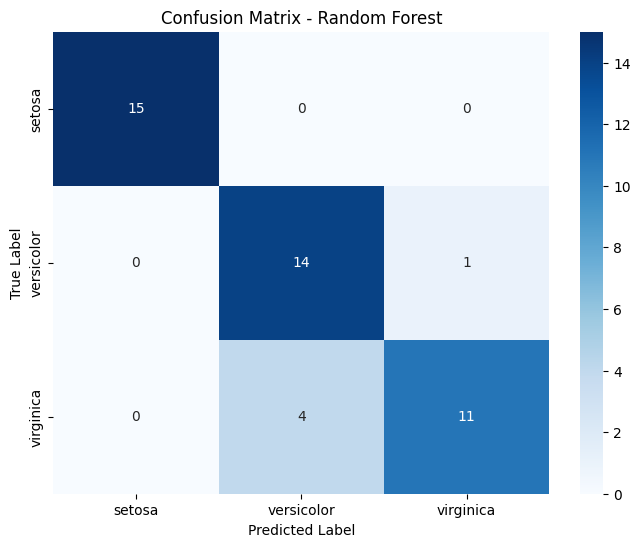

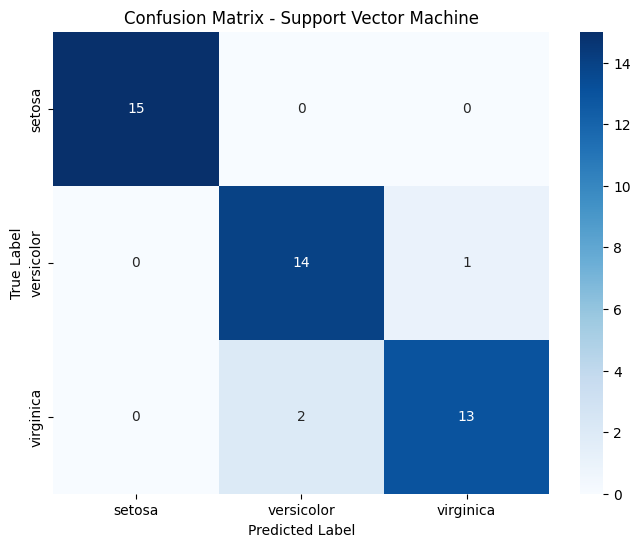

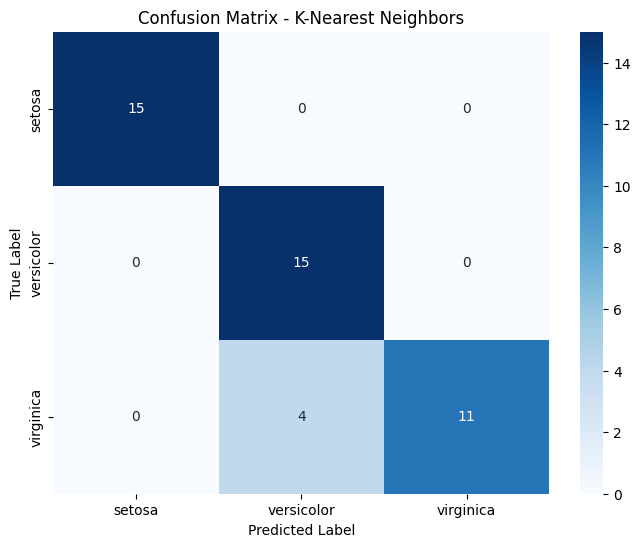

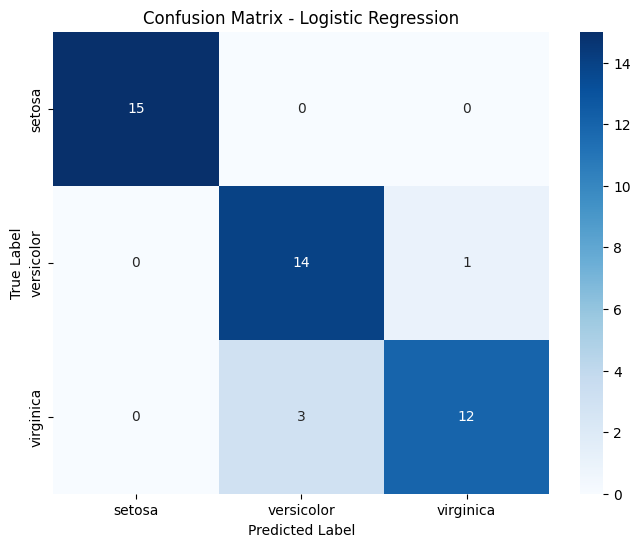

In [15]:
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Create and display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

([0, 1, 2, 3],
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'Support Vector Machine'),
  Text(2, 0, 'K-Nearest Neighbors'),
  Text(3, 0, 'Logistic Regression')])

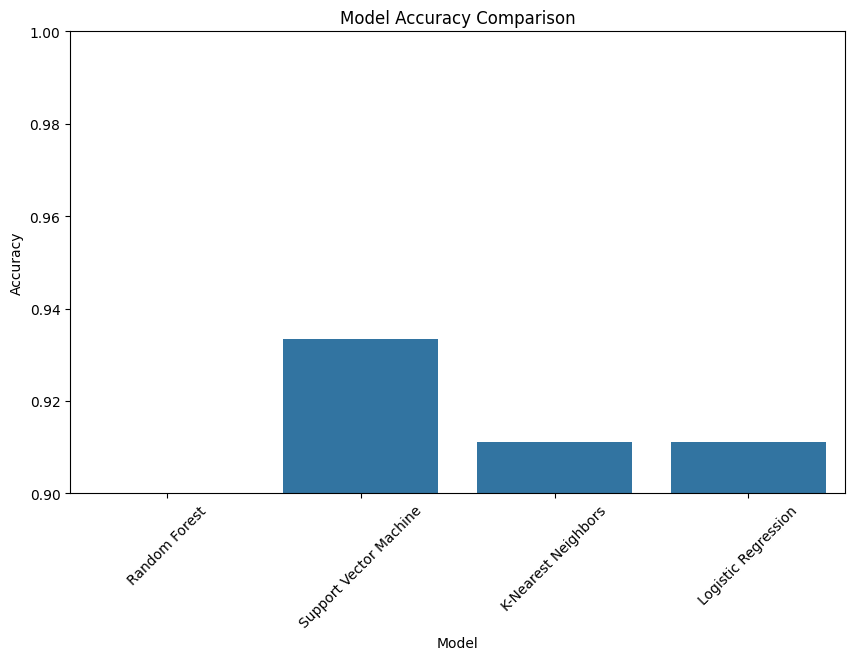

In [16]:
plt.figure(figsize=(10, 6))
models_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': list(results.values())
})
sns.barplot(x='Model', y='Accuracy', data=models_df)
plt.ylim(0.9, 1.0)  # Adjust as needed
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)

In [18]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]:.4f}")


Best Model: Support Vector Machine with accuracy 0.9333


In [19]:
if best_model_name == 'Random Forest':
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importance')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()

In [20]:
def predict_iris_species(model, scaler, new_data):
    """
    Predict the species of iris flowers based on their measurements.

    Parameters:
        model: Trained machine learning model
        scaler: Fitted StandardScaler
        new_data: Array of measurements [sepal_length, sepal_width, petal_length, petal_width]

    Returns:
        Predicted species name
    """
    # Ensure new_data is 2D
    if len(np.array(new_data).shape) == 1:
        new_data = [new_data]

    # Scale the new data
    new_data_scaled = scaler.transform(new_data)

    # Make prediction
    prediction = model.predict(new_data_scaled)

    # Return the species name
    return [target_names[p] for p in prediction]

In [21]:
sample_measurements = [5.1, 3.5, 1.4, 0.2]  # Example measurements
print(f"\nPredicted species for {sample_measurements}:")
print(predict_iris_species(best_model, scaler, sample_measurements))


Predicted species for [5.1, 3.5, 1.4, 0.2]:
[np.str_('setosa')]
